<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [3]:
def convertion(X):
    if (X<=5):
        return 0
    else:
        return 1

In [4]:
conf=np.vectorize(convertion)
df_wine.quality=conf(df_wine.quality)

In [5]:
df_wine.sample(frac=1)
trainsize=(df_wine.shape[0]//5)*4
testsize=df_wine.shape[0]-trainsize
training = df_wine[:trainsize]
test=df_wine[testsize:]


#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [8]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

In [6]:
Y_train = list(training.quality.values)
X_train = training.drop(["quality"], axis = 1)

In [9]:
for d in xrange(10):
    print "Для",d+1,"результат",cross_val_score(DecisionTreeClassifier(max_depth=d+1),X_train,Y_train,scoring="roc_auc").mean()

Для 1 результат 0.695254946757
Для 2 результат 0.72663849589
Для 3 результат 0.73082707463
Для 4 результат 0.712547173596
Для 5 результат 0.697609035137
Для 6 результат 0.660247375431
Для 7 результат 0.63868377294
Для 8 результат 0.616337328193
Для 9 результат 0.599641704561
Для 10 результат 0.5924890609


In [10]:
train_scores,test_scores=validation_curve(DecisionTreeClassifier(),X_train,Y_train,param_name="max_depth",param_range=range(1,10),scoring="roc_auc")

In [12]:
train_scores=np.mean(train_scores,axis=1)
test_scores=np.mean(test_scores,axis=1)

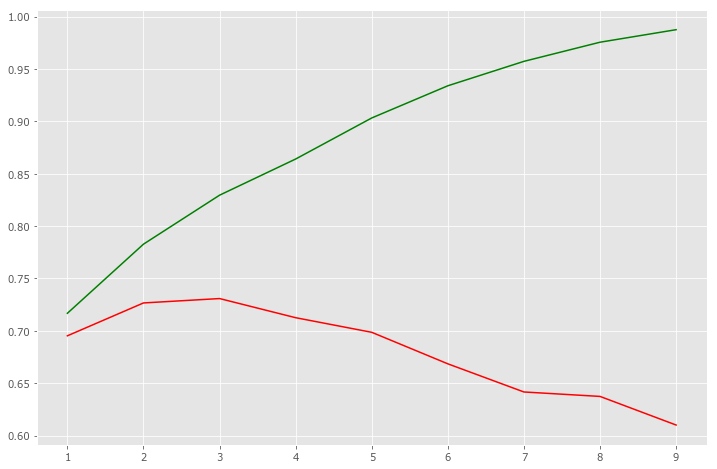

In [12]:
plt.figure()

plt.plot(range(1,10),train_scores,c="green")
plt.plot(range(1,10),test_scores,c="red")
plt.show()

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [90]:
random_state = np.random.RandomState(0)
model=DecisionTreeClassifier(max_depth=3,random_state=random_state)
model.fit(X_train,Y_train)
importances=model.feature_importances_

In [63]:
importances=np.concatenate((importances,[0]))

In [17]:
imp=pd.DataFrame(importances.reshape(1,-1),columns=df_wine.columns)

In [64]:
newindex=["imp"]
newindex.extend(range(1599))

In [81]:
with_imp=pd.concat((imp,df_wine))
with_imp.index=(newindex)
with_imp.sort_values(by="imp",axis=1,ascending=False)

,alcohol,sulphates,total sulfur dioxide,volatile acidity,pH,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,quality
imp,0.69624,0.170287,0.076298,0.035946,0.021229,0.0,0.00,0.0,0.000,0.0,0.00000,0.0
0,9.40000,0.560000,34.000000,0.700000,3.510000,7.4,0.00,1.9,0.076,11.0,0.99780,0.0
1,9.80000,0.680000,67.000000,0.880000,3.200000,7.8,0.00,2.6,0.098,25.0,0.99680,0.0
2,9.80000,0.650000,54.000000,0.760000,3.260000,7.8,0.04,2.3,0.092,15.0,0.99700,0.0
3,9.80000,0.580000,60.000000,0.280000,3.160000,11.2,0.56,1.9,0.075,17.0,0.99800,1.0
4,9.40000,0.560000,34.000000,0.700000,3.510000,7.4,0.00,1.9,0.076,11.0,0.99780,0.0
5,9.40000,0.560000,40.000000,0.660000,3.510000,7.4,0.00,1.8,0.075,13.0,0.99780,0.0
6,9.40000,0.460000,59.000000,0.600000,3.300000,7.9,0.06,1.6,0.069,15.0,0.99640,0.0
7,10.00000,0.470000,21.000000,0.650000,3.390000,7.3,0.00,1.2,0.065,15.0,0.99460,1.0
8,9.50000,0.570000,18.000000,0.580000,3.360000,7.8,0.02,2.0,0.073,9.0,0.99680,1.0


In [82]:
df_wine.sample(frac=1)
trainsize=(df_wine.shape[0]//5)*4
testsize=df_wine.shape[0]-trainsize
training = df_wine[:trainsize]
test=df_wine[testsize:]
Y_train = list(training.quality.values)
X_train = training.drop(["quality"], axis = 1)
Y_test=list(test.quality.values)
X_test = test.drop(["quality"], axis = 1)

#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [91]:
Y_score_train=model.predict(X_test)
Y_score_test=model.predict(X_train)
from sklearn.metrics import roc_curve, auc

In [92]:
fpr_test, tpr_test, _ = roc_curve(Y_test, Y_score_test)
roc_auc_test= auc(fpr_test, tpr_test)

In [93]:
fpr_train, tpr_train, _ = roc_curve(Y_train, Y_score_train)
roc_auc_train= auc(fpr_train, tpr_train)

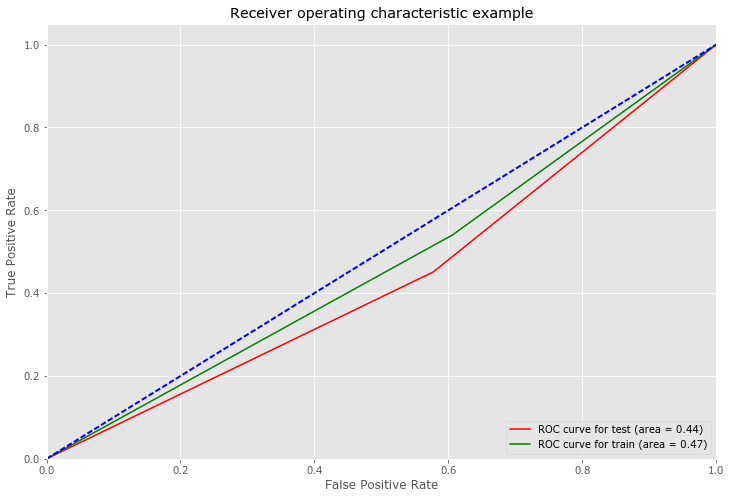

In [102]:
plt.figure()
plt.plot(fpr_test, tpr_test, color='red',
         label='ROC curve for test (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='green',
         label='ROC curve for train (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Другие меры качества:

In [95]:
model.score(X_test,Y_test)

0.73589341692789967

In [101]:
scores = cross_val_score(DecisionTreeClassifier(max_depth=d+1),X_test,Y_test,scoring="accuracy")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.03)


In [100]:
scores = cross_val_score(model,X_test,Y_test,scoring="precision")
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precision: 0.72 (+/- 0.06)


#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [247]:
simple=cross_val_score(DecisionTreeClassifier(max_depth=3),X_train,Y_train,scoring="roc_auc").mean()

In [239]:
Forest_scores=validation_curve(RandomForestClassifier(),X_train,Y_train,param_name="n_estimators",param_range=range(10,110,10),scoring="roc_auc")

In [240]:
Bag_scores=validation_curve(BaggingClassifier(),X_train,Y_train,param_name="n_estimators",param_range=range(10,110,10),scoring="roc_auc")

In [241]:
Forest_scores=np.mean(Forest_scores,axis=0)
Bag_scores=np.mean(Bag_scores,axis=0)

In [244]:
Forest_scores=np.mean(Forest_scores,axis=1)
Bag_scores=np.mean(Bag_scores,axis=1)

In [249]:
Simple_scores=np.empty(10)
Simple_scores.fill(simple)


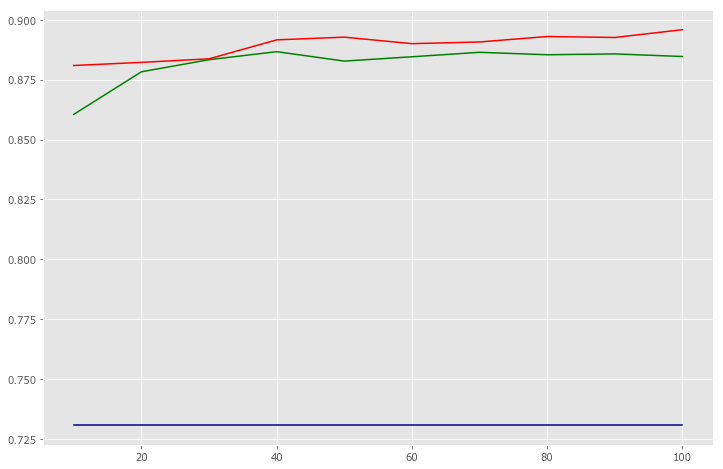

In [251]:
plt.figure()
plt.plot(range(10,110,10),Bag_scores,c="green")
plt.plot(range(10,110,10),Forest_scores,c="red")
plt.plot(range(10,110,10),Simple_scores,c="navy")
plt.show()

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [104]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid=dict(n_estimators=range(10,110,10),max_depth=range(1,8,1),criterion=["gini","entropy"])

In [120]:
grid=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)

In [121]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [122]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 90}

In [125]:
The_best=grid.best_estimator_

In [128]:
cross_val_score(The_best,X_train,Y_train).mean()

0.71557120500782467

In [129]:
The_best.score(X_test,Y_test)

0.76802507836990597

Результаты на контрольной выборке оказались лучше, чем результаты кросс-валидации на тренировочной